# INVESTMENT PREDICTION
### Study the investment pattern of bank customers to predict whether a new customer will invest or not

In [7]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [8]:
df = pd.read_csv("/home/anjana/study/case_study/Investment.csv")

In [9]:
df.shape

(41188, 21)

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,No
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,No
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,Yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,No
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,Yes


In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
Invested           object
dtype: object

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Check whether it have null values

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
Invested          0
dtype: int64

In [14]:
int(df.duplicated().sum())

12

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [16]:
#replace yes with 1 and no with 0 in invested column
df['Invested'] = df['Invested'].replace(['Yes', 'No'], [1,0])
df['Invested'] = df['Invested'].infer_objects(copy=False)

/tmp/ipykernel_28601/3211519155.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Invested'] = df['Invested'].replace(['Yes', 'No'], [1,0])


In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [18]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
Invested            int64
dtype: object

#### Handling Outliers

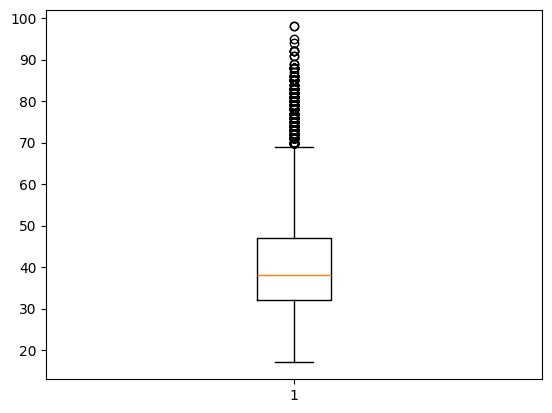

In [19]:
plt.boxplot(df['age']) #has outliers
plt.show()

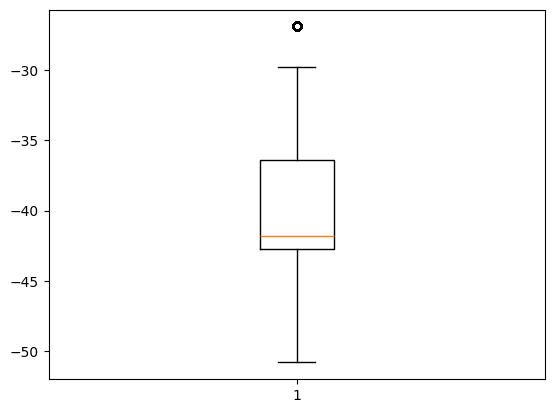

In [20]:
plt.boxplot(df['cons_conf_idx']) #has outliers
plt.show()

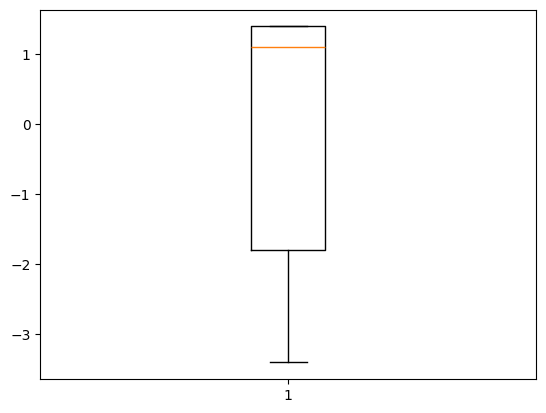

In [21]:
plt.boxplot(df['emp_var_rate']) #no outliers
plt.show()

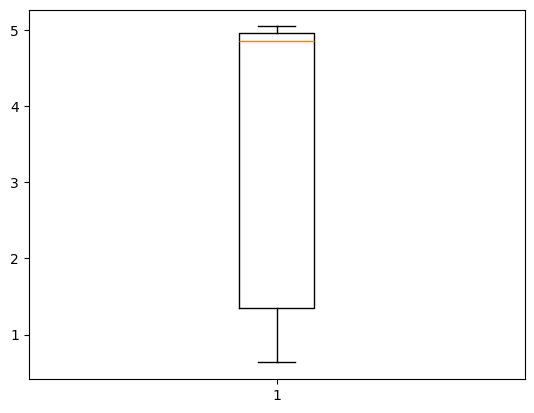

In [22]:
plt.boxplot(df['euribor3m']) #no outliers
plt.show()

In [23]:
def remove_outlier(d,c):
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    good_data=d[(d[c]>lb) & (d[c]<ub)]
    return good_data

<function matplotlib.pyplot.show(close=None, block=None)>

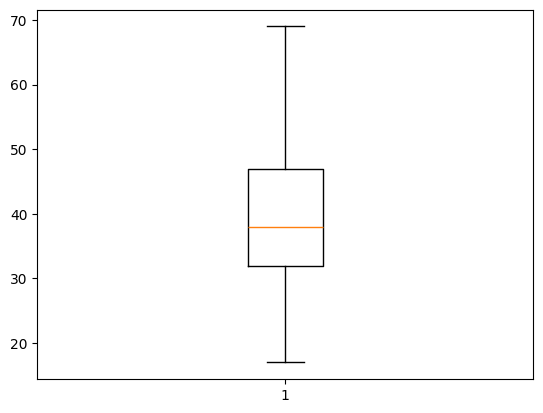

In [24]:
df=remove_outlier(df,'age')
plt.boxplot(df['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

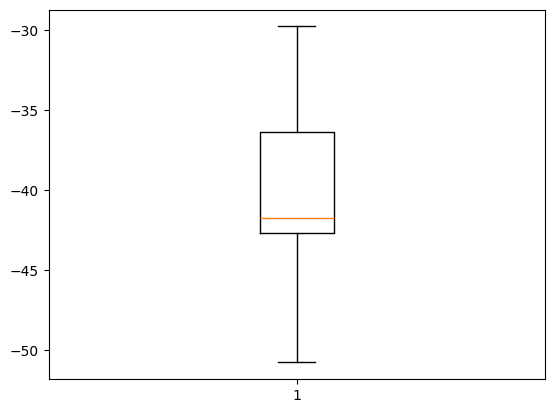

In [25]:
df=remove_outlier(df,'cons_conf_idx')
plt.boxplot(df['cons_conf_idx'])
plt.show

#### Check values in categorical variable to ensure there is no issue

In [26]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_cols:
    print(df[col].unique())

['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
['unknown' 'no' 'yes']
['yes' 'no' 'unknown']
['no' 'yes' 'unknown']
['cellular' 'telephone']
['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
['thu' 'fri' 'tue' 'mon' 'wed']
['nonexistent' 'success' 'failure']


#### Replace 'basic.4y', 'basic.6y', 'basic.9y' with 'basic' in 'education' column

In [27]:
df['education'] = df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')
print(df['education'].unique())

['basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


/tmp/ipykernel_28601/3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

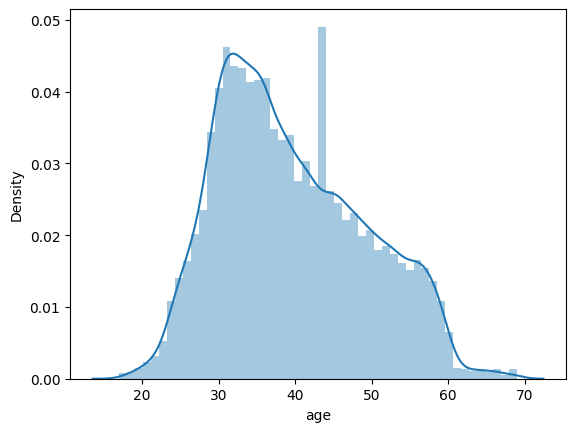

In [28]:
sns.distplot(df['age'])

/tmp/ipykernel_28601/3902608968.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


<Axes: xlabel='duration', ylabel='Density'>

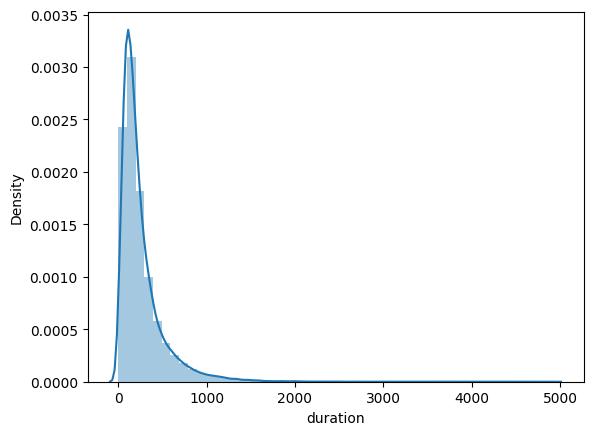

In [29]:

sns.distplot(df['duration'])

/tmp/ipykernel_28601/449498931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['emp_var_rate'])


<Axes: xlabel='emp_var_rate', ylabel='Density'>

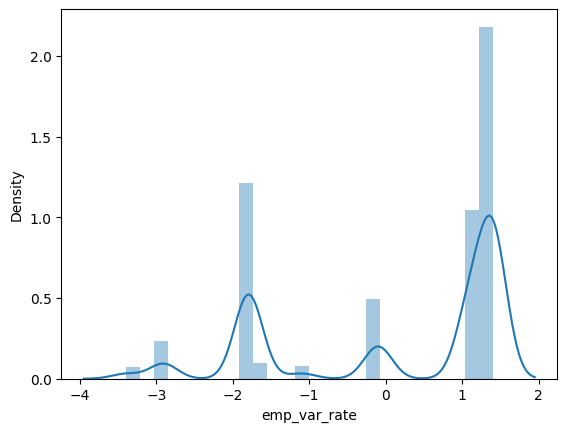

In [30]:
sns.distplot(df['emp_var_rate'])

<Axes: xlabel='Invested'>

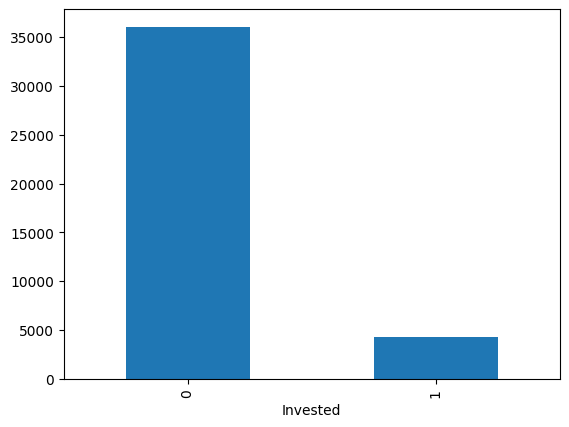

In [31]:
df.groupby('Invested')['Invested'].count().plot(kind='bar')

<Axes: xlabel='job'>

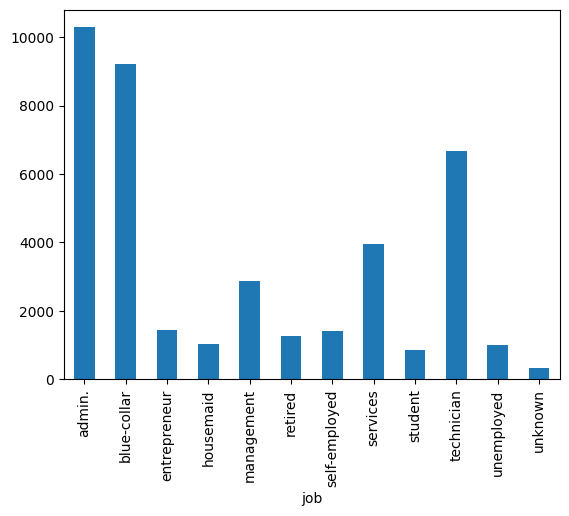

In [32]:
df.groupby('job')['job'].count().plot(kind='bar')

<Axes: xlabel='education'>

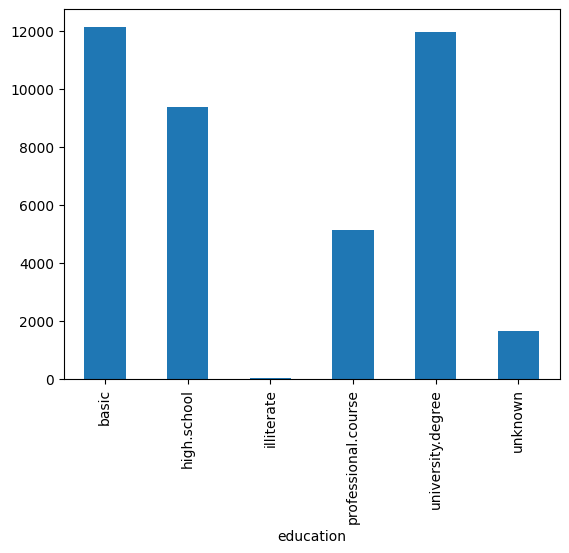

In [33]:
df.groupby('education')['education'].count().plot(kind='bar')

<Axes: xlabel='marital'>

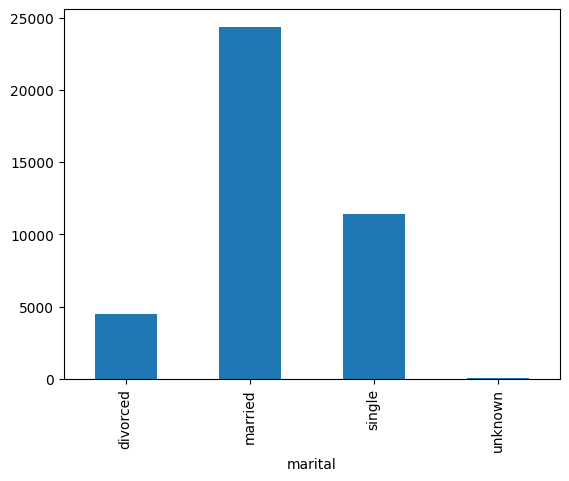

In [34]:
df.groupby('marital')['marital'].count().plot(kind='bar')

#### Correlation Plot:

<Axes: >

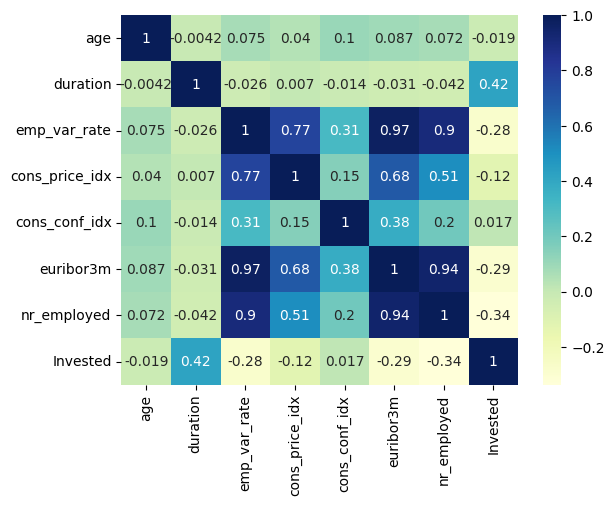

In [35]:
df_numeric = df.select_dtypes(include=['int64', 'float64']).drop(['campaign', 'pdays', 'previous'], axis=1) #remove cateogorical variable
sns.heatmap(df_numeric.corr(), cmap='YlGnBu', annot=True)



In [36]:
#one hot coding (dummy conversion)
df_categorical=df.select_dtypes(include='object')
df_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41182,admin.,married,high.school,no,yes,no,cellular,may,thu,failure
41183,retired,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic,unknown,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,nonexistent


In [37]:
#create dummies
df_dummies=pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [38]:
#create final data
df_final=pd.concat([df_numeric,df_dummies], axis=1)
df_final.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0,True,False,...,False,False,False,False,False,True,False,False,True,False
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0,False,False,...,False,True,False,False,False,False,False,False,True,False
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1,False,False,...,False,False,False,False,False,True,False,False,False,True
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1,False,False,...,False,False,False,False,False,False,False,False,False,True


In [39]:
#create x and y
x=df_final.drop('Invested',axis=1)
y=df_final['Invested']
#check x and y
print(x.shape, y.shape)

(40316, 48) (40316,)


In [40]:
#Create Training and test samples
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=999)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(28221, 48) (12095, 48) (28221,) (12095,)


In [41]:

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'decsion tree' : DecisionTreeClassifier(max_depth=5)
}


In [42]:

evaluation_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    evaluation_results['Model'].append(model_name)
    evaluation_results['Accuracy'].append(accuracy)
    evaluation_results['Precision'].append(precision)
    evaluation_results['Recall'].append(recall)
    evaluation_results['F1-Score'].append(f1)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
# Create a DataFrame to display the results
results_df = pd.DataFrame(evaluation_results)

# Print the results table
print("\nModel Evaluation Metrics Comparison:")
print(results_df)



/home/anjana/study/case_study/djenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9140
K-Nearest Neighbors Accuracy: 0.9057
Naive Bayes Accuracy: 0.8842
Support Vector Machine Accuracy: 0.8976
Random Forest Accuracy: 0.9196
decsion tree Accuracy: 0.9171

Model Evaluation Metrics Comparison:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.914014   0.642494  0.399525  0.492683
1     K-Nearest Neighbors  0.905663   0.560353  0.451741  0.500219
2             Naive Bayes  0.884250   0.445860  0.443038  0.444444
3  Support Vector Machine  0.897561   0.727273  0.031646  0.060652
4           Random Forest  0.919554   0.654623  0.487342  0.558730
5            decsion tree  0.917073   0.615181  0.551424  0.581560


In [43]:
csv_file_path = '/home/anjana/study/case_study/Investment_Preprocessed1.csv'
df.to_csv(csv_file_path, index=False)